<a href="https://colab.research.google.com/github/veerankiteja/FMML-LAB-ASSIGNMENTS/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

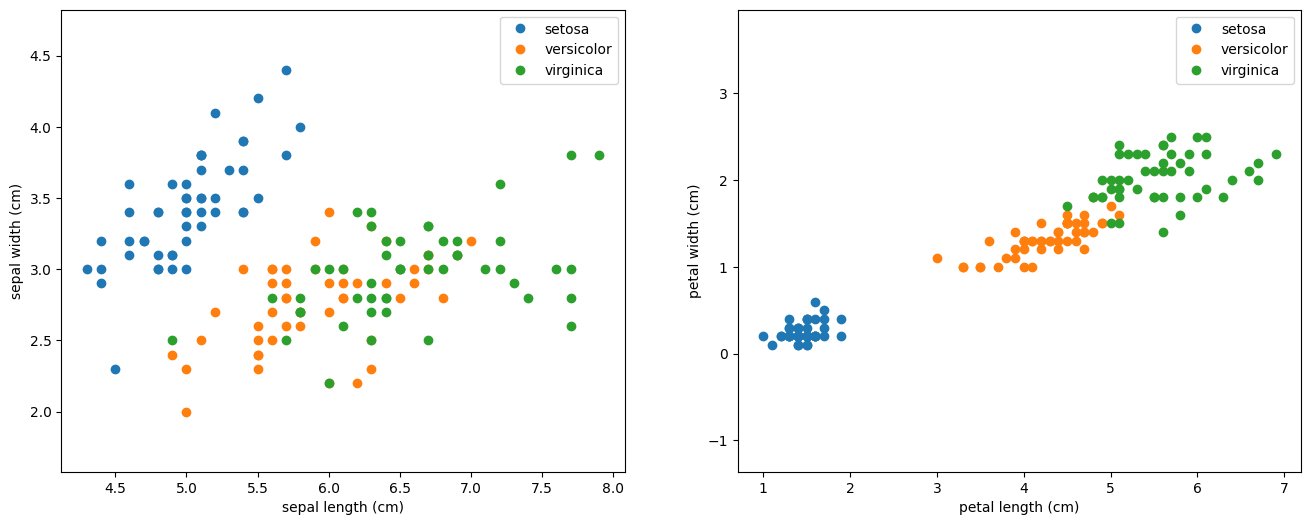

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 317.35it/s]


# Plot training progress

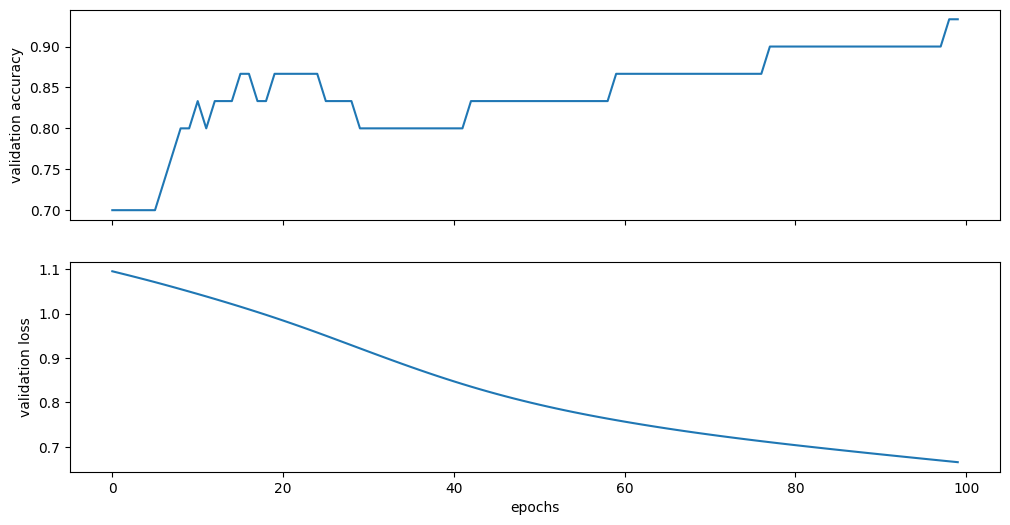

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

1Q

Sure, adjusting the number of hidden layers in a neural network can have a significant impact on its performance and learning capacity. Here are some considerations for changing the number of hidden layers:

1. **Increasing the Number of Layers**:
   - Adding more hidden layers can potentially help the model learn complex patterns and representations from the data.
   - Deeper networks can sometimes capture hierarchical features in the data more effectively, leading to better generalization.
   - However, deeper networks may also be prone to overfitting, especially if not enough data or regularization techniques are used.

2. **Decreasing the Number of Layers**:
   - Simplifying the network by reducing the number of hidden layers might make the model easier to train, especially with smaller datasets.
   - Shallower networks can be computationally less expensive and require less memory, which can be advantageous in certain applications.
   - However, reducing the number of layers might limit the model's ability to learn complex patterns in the data.

3. **Finding the Right Balance**:
   - The optimal number of hidden layers often depends on the specific dataset and problem you are working on.
   - Experimentation and model validation are crucial to determine the ideal architecture for your neural network.
   - Techniques like cross-validation and monitoring performance metrics (like validation loss) can help in assessing the effectiveness of different layer configurations.

4. **Considering Existing Architectures**:
   - Sometimes, using pre-designed architectures (e.g., architectures like ResNet, VGG, etc.) that are already proven effective for similar tasks can save time and effort.
   - These architectures often have a specific number of layers and configurations that have been optimized for various tasks and datasets.

In practice



2Q

Certainly! Adjusting the number of neurons (units) in the hidden layers of a neural network can also impact its performance and behavior. Here's how changing the number of neurons in a hidden layer can affect the model:

1. **Increasing the Number of Neurons**:
   - Adding more neurons in a hidden layer can increase the model's capacity to learn complex patterns from the data.
   - With more neurons, the network can potentially capture more intricate features and relationships in the input data.
   - However, increasing the number of neurons also increases the model's parameters, which can lead to longer training times and a higher risk of overfitting, especially if not regularized properly.

2. **Decreasing the Number of Neurons**:
   - Reducing the number of neurons in a hidden layer can simplify the model and make it more computationally efficient.
   - A smaller number of neurons might help prevent overfitting, especially if the data is limited or noisy.
   - However, reducing the number of neurons excessively can lead to underfitting, where the model may struggle to capture important patterns in the data.

3. **Finding the Optimal Number of Neurons**:
   - The ideal number of neurons in a hidden layer is often determined through experimentation and model validation.
   - It can depend on factors such as the complexity of the problem, the size of the dataset, and the overall architecture of the neural network.
   - Techniques like grid search or random search combined with cross-validation can be used to explore different configurations of neurons and identify the one that yields the best performance on validation data.

4. **Considerations for Deep Networks**:
   - In deeper networks, the number of neurons in each layer might vary to control the flow of information and prevent issues like vanishing or exploding gradients.
   - Typically, the number of neurons might decrease or remain constant as you move deeper into the network.

5. **Balancing Complexity and Generalization**:
   - It's crucial to strike a balance between model complexity (capturing important patterns) and generalization (ability to perform well on unseen data).
   - Regularization techniques (like dropout, L2 regularization) can be employed to prevent overfitting when using larger numbers of neurons.

Experimenting with different numbers of neurons in the hidden layers and monitoring the model's performance on validation data is key to optimizing a neural network for a specific task. This iterative process helps in fine-tuning the architecture to achieve the best possible results.

3Q


Certainly! Changing the activation function in a neural network can have a significant impact on the model's performance and learning behavior. Here are some commonly used activation functions and how they differ:

1. **ReLU (Rectified Linear Unit)**:
   - ReLU is one of the most popular activation functions used in deep learning.
   - It sets all negative values to zero and keeps positive values unchanged (`f(x) = max(0, x)`).
   - ReLU is computationally efficient and helps alleviate the vanishing gradient problem.
   - However, it can suffer from the "dying ReLU" problem where neurons get stuck in the zero region during training.

2. **Sigmoid**:
   - Sigmoid function squashes the input to the range [0, 1] (`f(x) = 1 / (1 + e^(-x))`).
   - It's commonly used in binary classification problems as it outputs probabilities.
   - Sigmoid saturates and gradients vanish for extreme values, leading to slower convergence and vanishing gradient issues in deep networks.

3. **Tanh (Hyperbolic Tangent)**:
   - Tanh function squashes the input to the range [-1, 1] (`f(x) = (e^(x) - e^(-x)) / (e^(x) + e^(-x))`).
   - Like sigmoid, tanh is used in models where inputs are centered around zero.
   - It has stronger gradients than sigmoid, but it can still suffer from vanishing gradients.

4. **Leaky ReLU**:
   - Leaky ReLU addresses the dying ReLU problem by allowing a small, non-zero gradient for negative inputs (`f(x) = max(ax, x)` where `a` is a small constant like 0.01).
   - It can help maintain gradients flowing during training and has shown improvements over traditional ReLU.

5. **Softmax**:
   - Softmax function is used in multi-class classification problems to convert raw scores into probabilities (`f(x_i) = e^(x_i) / sum(e^(x_j))` for all `j`).
   - It ensures that the output probabilities sum up to 1.

6. **Others (e.g., Swish, PReLU, ELU)**:
   - There are several other activation functions like Swish, Parametric ReLU (PReLU), and Exponential Linear Unit (ELU) that have been proposed to address specific issues like vanishing gradients and improve training dynamics.

**Observing Changes**:
- Changing the activation function can affect the model's ability to learn and generalize from the data.
- For example, using ReLU often leads to faster convergence compared to sigmoid and tanh due to its non-saturating nature.
- Leaky ReLU and variants like PReLU can help mitigate issues like dead neurons encountered with traditional ReLU.
- Experimenting with different activation functions and monitoring the model's performance on validation data is crucial to determine which activation function works best for a specific task and dataset.

In practice, the choice of activation function often depends on the nature of the problem, the architecture of the network, and empirical results obtained through experimentation. It's recommended to try different activation functions and assess their impact on model performance to determine the most suitable one for your neural network.